In [47]:
import os
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw

In [55]:
# define paths
soft_prediction_path = 'soft_optimize_property.csv'
hard_prediction_path = 'hard_optimize_property.csv'
patience_prediction_path = 'patience_optimize_property.csv'

In [56]:
soft_predictions = pd.read_csv(soft_prediction_path)
hard_predictions = pd.read_csv(hard_prediction_path)
patience_predictions = pd.read_csv(patience_prediction_path)

Sample: 0 

Original O=C(N1CC(CCCC)CCCCCC)/C(C2=CC=C(C(SC(/C=C(C3=O)/C(C4=CC=CC=C34)=C(C#N)\C#N)=C5)=C5CC(CCCC)CCCCCC)C=C12)=C6C7=CC=C(C(SC(/C=C(C8=O)/C(C9=CC=CC=C89)=C(C#N)\C#N)=C%10)=C%10CC(CCCC)CCCCCC)C=C7N(CC(CCCC)CCCCCC)C\6=O


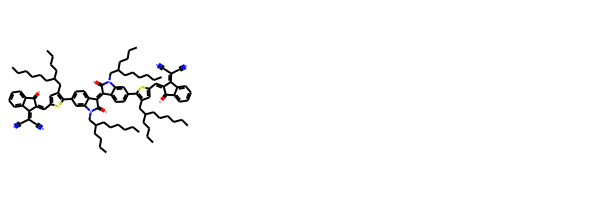



Prediction CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC(C=O)CCCCC


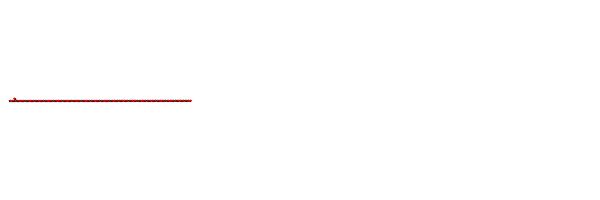

Sample: 1 

Original CCCCCCCCC1=C2C(C(C3=CC=C(CCCCCC)C=C3)(C4=CC=C(CCCCCC)C=C4)C5=C6SC(/C=C(C7=O)\C(C8=CC(Cl)=C(Cl)C=C78)C(C#N)C#N)=C5)=C6SC2=C(CCCCCCCC)C9=C1SC%10=C9C(C%11=CC=C(CCCCCC)C=C%11)(C%12=CC=C(CCCCCC)C=C%12)C%13=C%10SC(/C=C(C%14=O)/C(C%15=CC(Cl)=C(Cl)C=C%14%15)=C(C#N)/C#N)=C%13


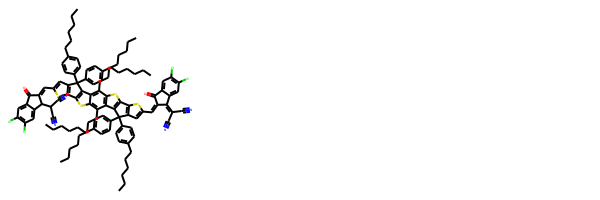



Prediction CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC


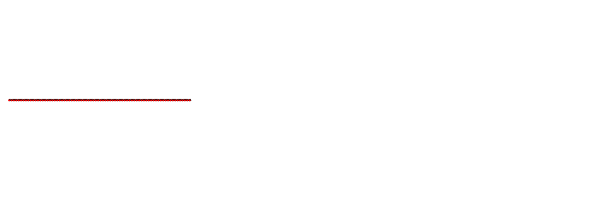

Sample: 2 

Original CCCCCCC1=CC=C(C2(C3=CC=C(CCCCCC)C=C3)C4=CC(C(SC(C5=CC(C6(CCCCCCCC)CCCCCCCC)=C(C7=C6C=C(/C=C(C8=O)/C(C9=CC(Cl)=C(Cl)C=C89)=C(C#N)/C#N)S7)S5)=C%10)=C%10C%11(C%12=CC=C(CCCCCC)C=C%12)C%13=CC=C(CCCCCC)C=C%13)=C%11C=C4C%14=C2C=C(C%15=CC(C%16(CCCCCCCC)CCCCCCCC)=C(C%17=C%16C=C(/C=C(C%18=O)/C(C%19=CC(Cl)=C(Cl)C=C%18%19)=C(C#N)\C#N)S%17)S%15)S%14)C=C1


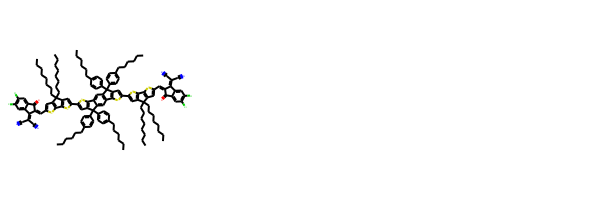



Prediction CCCCCCc1ccc(C2=C3C(C=C4C(=O)c5ccccc5C4=C(C#N)C#N)=CSC3c3c2c2c(c4c3-c3cc(C=C5C6C=CC=CC6=C6C=CC=CC56)sc3C4(c3ccc(CCCCCC)cc3)c3ccc(CCCCCC)c4c3C(=Cc3ccc(C=Cc5cc(OC)c(-c6ccc(C=C(C#N)C#N)s6)cc5CCCCCC)s3)N(CC(CCCC)CCCCCC)C4)C(c3ccc(CCCCCC)cc3)=C3C(C=C4C(=O)c5ccccc5C4=C(C#N)C#N)=CSC32)cc1


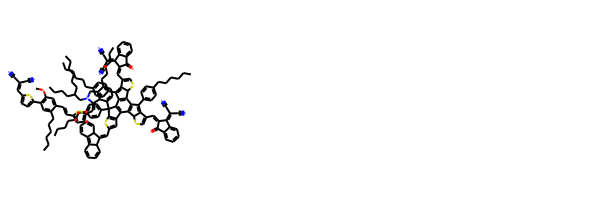

Sample: 3 

Original O=C1C(/C(C2=CSC=C12)=C(C#N)\C#N)=C/C3=CC(C(C4=CC=C(CCCCCC)C=C4)(C5=CC=C(CCCCCC)C=C5)C6=CC7=C(C(C8=CC=C(CCCCCC)C=C8)(C9=CC=C(CCCCCC)C=C9)C%10=C7SC(/C=C(C%11=O)/C(C%12=CSC=C%11%12)=C(C#N)\C#N)=C%10)C=C%136)=C%13S3


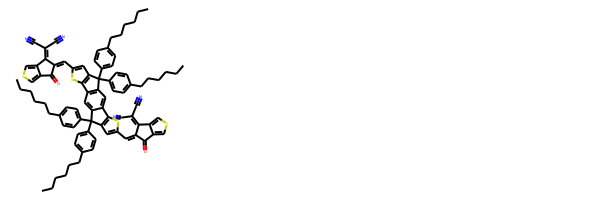



Prediction CCCCCCc1ccc(C2=C3C=C(C=C4C(=O)c5ccccc5C4=C(C#N)C#N)SC3C3=C2C=C2C4SC(C=C5CC=CC5=C(C#N)C#N)=CC4=CC24C3c2c3c(c5c(c2C4(c2ccccc2)c2ccc(C=Cc4ccc(C=C(C#N)C#N)s4)c4ccsc24)C2SC(C=C4C(=O)c6ccccc6C4=C(C#N)C#N)=CC2=C5c2ccc(CCCCCC)cc2)C2SC(C=C4C(=O)c5ccccc5C4=C(C#N)C#N)=CC2=C3c2ccc(CCCCCC)cc2)cc1


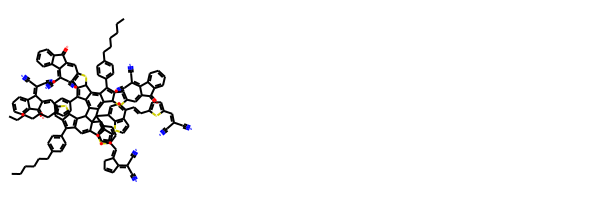

Sample: 4 

Original O=C1C(/C(C2=CSC=C12)=C(C#N)\C#N)=C/C3=CC4=C(C(C(C5=CC=C(CCCCCC)C=C5)(C6=CC=C(CCCCCC)C=C6)C7=CC(C(SC(/C=C(C8=O)/C(C9=CSC=C89)=C(C#N)\C#N)=C%10)=C%10C%11(C%12=CC=C(CCCCCC)C=C%12)C%13=CC=C(CCCCCC)C=C%13)=C%11C=C%147)=C%14S4)S3


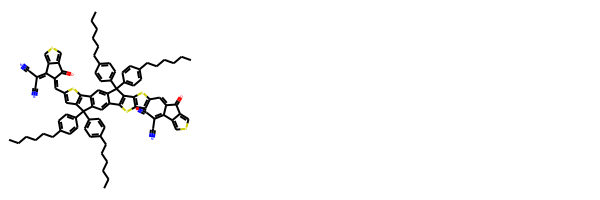



Prediction CCCCCCc1ccc(C2=C3C=C(C=C4C(=O)c5ccccc5C4=C(C#N)C#N)SC3C3=C4C5SC(C=C6CC=CC6=C(C#N)C#N)=CC5=CC45C(c4ccccc4)(c4ccc(C=Cc6ccc(C=C(C#N)C#N)s6)c6ccsc46)c4cc6c(cc4C54C(=C23)C(c2ccc(CCCCCC)cc2)=C2C=C(C=C3C(=O)c5ccccc5C3=C(C#N)C#N)SC24)C2SC(C=C3C(=O)c4ccccc4C3=C(C#N)C#N)=CC2=C6c2ccc(CCCCCC)cc2)cc1


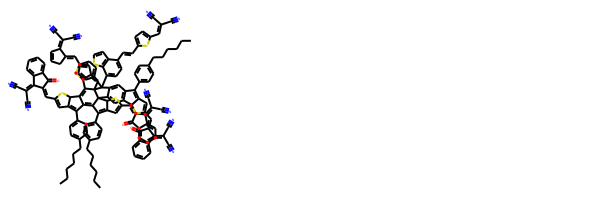

Sample: 5 

Original O=C1C(/C(C2=CSC=C12)=C(C#N)\C#N)=C/C3=CC4C(C(C(C5=CC=C(CCCCCC)C=C5)(C6=CC=C(CCCCCC)C=C6)C7=CC(C(SC8=C9SC(/C=C(C%10=O)/C(C%11=CSC=C%10%11)=C(C#N)\C#N)=C8)=C9C%12(C%13=CC=C(CCCCCC)C=C%13)C%14=CC=C(CCCCCC)C=C%14)=C%12C=C%157)=C%15S4)S3


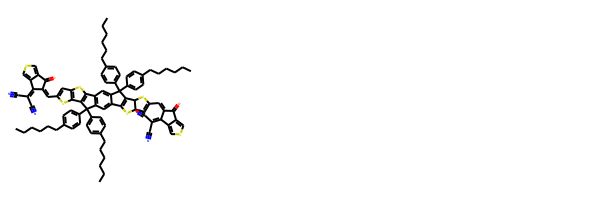



Prediction CC1(C)c2cc(N(c3ccccc3)c3ccccc3)ccc2-c2ccc3c(c21)-c1ccc(N(c2ccccc2)c2ccccc2)cc1C3(c1ccc2c(c1)C1SC=CC1C2)c1ccc(C=Cc2ccc(C=C(C#N)C#N)s2)c2ccsc12


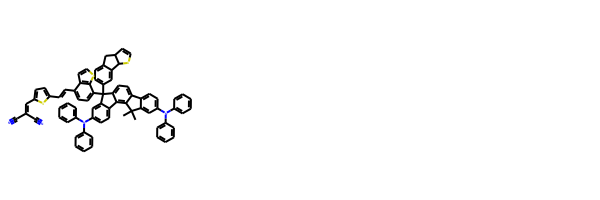

Sample: 6 

Original O=C(C(/C1=C(C#N)/C#N)=C\C2=CC(C(C3=CC=C(CCCCCC)C=C3)(C4=CC=C(CCCCCC)C=C4)C5=C6SC7=C5C(C8=CC=C(CC(CC)CCCC)S8)=C(SC9=C%10C(C%11=CC=C(CCCCCC)C=C%11)(C%12=CC=C(CCCCCC)C=C%12)C%13=C9SC(/C=C%14\C(C(C=CC=C%15)=C%15C%14=O)=C(C#N)\C#N)=C%13)C%10=C7C%16=CC=C(CC(CC)CCCC)S%16)=C6S2)C%17=C1C=CC=C%17


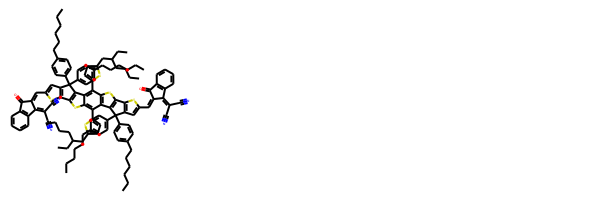



Prediction CCCCCCc1ccc(C2=C3C=C(C=C4Cc5ccccc5C4=C(C#N)C#N)SC3c3c2c(C=Cc2cc4c(s2)C2SC(C=C(C#N)C#N)=CC2=C4C)c2ccsc2c3C(c2ccccc2)(c2ccc(C=Cc3cc4c(s3)C3SC(C)=CC3=C4)c3ccsc23)c2c3c(c(C=Cc4cc5c(s4)C4SC(C=C(C#N)C#N)=CC4=C5C)c4ccsc24)C(c2ccc(CCCCCC)cc2)=C2C=C(C=C4Cc5ccccc5C4=C(C#N)C#N)SC23)cc1


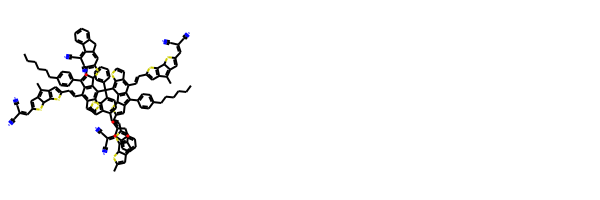

Sample: 7 

Original CCCCCCC1=CC=C(S1)C2(C(S3)=CC=C3CCCCCC)C(C(SC(/C=C(C4=O)/C(C5=CSC=C45)=C(C#N)\C#N)=C6)=C6S7)=C7C8=CC9=C(C(SC(/C=C(C%10=O)/C(C%11=CSC=C%10%11)=C(C#N)\C#N)=C%12)=C%12C9(C(S%13)=CC=C%13CCCCCC)C(S%14)=CC=C%14CCCCCC)C=C28


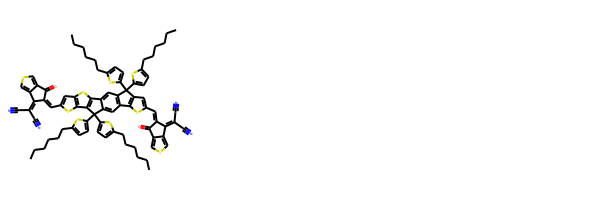



Prediction CCCCCCc1ccc(C2=C3C(C=C4Cc5ccccc5C4=C(C#N)C#N)=CSC3c3c2c2c(c4c3C3SC=C(C=C5Cc6ccccc6C5=C(C#N)C#N)C3=C4c3ccc(CCCCCC)cc3)C(c3ccc(CCCCCC)cc3)(c3ccc(CCCCCC)c4c3C(=Cc3ccc(C=Cc5cc(OC)c(-c6ccc(C=C(C#N)C#N)s6)cc5CCCCCC)s3)N(C)C4)c3sc(C=C4C(=O)c5ccccc5C4=Cc4ccc(C=Cc5ccc(CCCCCC)cc5CCCCCC)s4)cc3-2)cc1


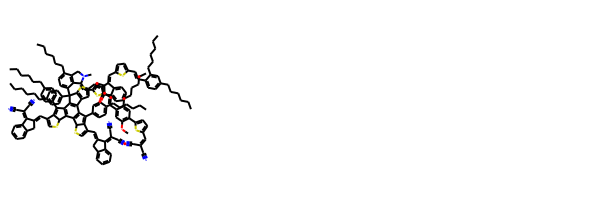

Sample: 8 

Original CCCCCCC1=CC=C(C=C1)C2(C(C=C3)=CC=C3CCCCCC)C(C(SC(/C=C(C4=O)/C(C5=CC=CC=C45)=C(C#N)\C#N)=C6)=C6S7)=C7C8=CC9=C(C(SC(/C=C(C%10=O)/C(C%11=CC=CC=C%10%11)=C(C#N)\C#N)=C%12)=C%12C9(C(C=C%13)=CC=C%13CCCCCC)C(C=C%14)=CC=C%14CCCCCC)C=C28


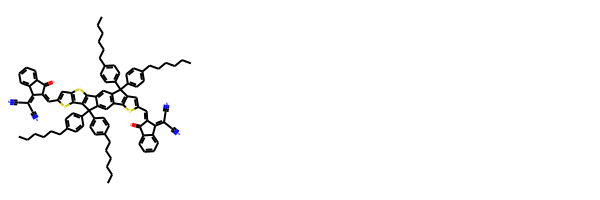



Prediction CCCCCCc1ccc(C2=C3c4sc(C=C5C(=O)c6ccccc6C5=C(C#N)C#N)cc4SC3c3ccc4c(c32)C(c2ccc(CCCCCC)cc2)(c2ccc(CCCCCC)cc2)c2scc(C=C3C5C=CC=CC5=C5C=CC=CC35)c2-4)cc1


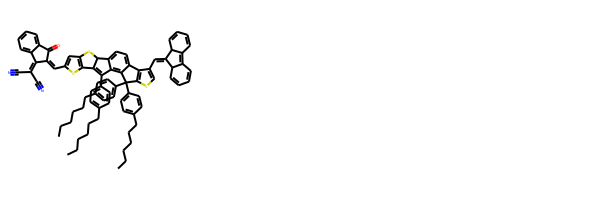

Sample: 9 

Original O=C1C(/C(C2=CC(Cl)=C(Cl)C=C12)=C(C#N)/C#N)=C/C3=CC(C(C4=CC=C(CCCCCC)C=C4)(C5=CC=C(CCCCCC)C=C5)C6=C7SC8=C(C9=CC=C(CC(CC)CCCC)S9)C%10=C(SC%11=C%10C(C%12=CC=C(CCCCCC)C=C%12)(C%13=CC=C(CCCCCC)C=C%13)C%14=C%11SC(/C=C(C%15=O)/C(C%16=CC(Cl)=C(Cl)C=C%15%16)=C(C#N)/C#N)=C%14)C(C%17=CC=C(CC(CC)CCCC)S%17)=C68)=C7S3


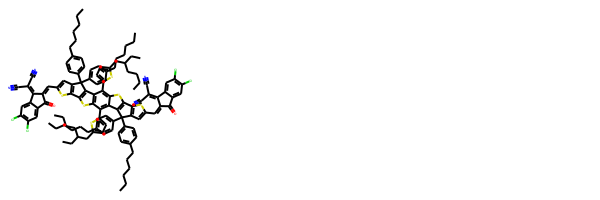



Prediction CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC(CC)CCCCC


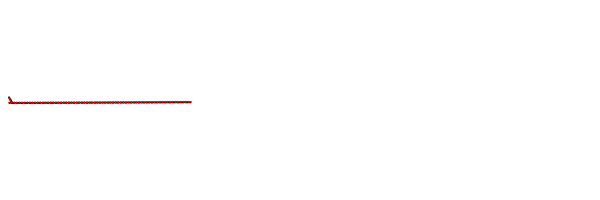

Sample: 10 

Original O=C1C(/C(C2=CC(Cl)=C(Cl)C=C12)=C(C#N)/C#N)=C/C3=CC(C(C4=CC=C(CCCCCC)C=C4)(C5=CC=C(CCCCCC)C=C5)C6=C7SC8=C(C9=CC(F)=C(CC(CC)CCCC)S9)C%10=C(SC%11=C%10C(C%12=CC=C(CCCCCC)C=C%12)(C%13=CC=C(CCCCCC)C=C%13)C%14=C%11SC(/C=C(C%15=O)/C(C%16=CC(Cl)=C(Cl)C=C%15%16)=C(C#N)/C#N)=C%14)C(C%17=CC(F)=C(CC(CC)CCCC)S%17)=C68)=C7S3


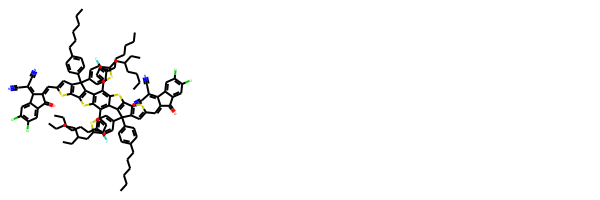



Prediction CCCCCCCCCCCCCC1Sc2scc(C=C(C#N)C#N)c2C1CCCc1cccc(OCC(CC)CCCCC)c1C=C1c2cc(C=C3C(=O)c4ccccc4C3=C(C#N)C#N)ccc2-c2c1ccc1c3c(sc21)C1SC(C=C2C(=O)C(=C(C#N)C#N)c4cc(Cl)c(Cl)cc42)=CC1=C3c1ccc(CCCCCC)cc1


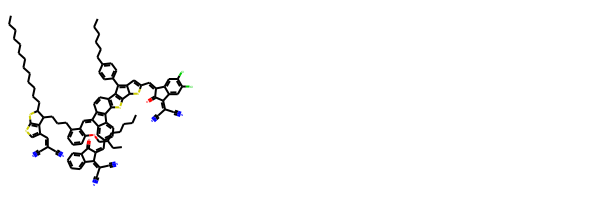

Sample: 11 

Original O=C1C(/C(C2=CC(Cl)=C(Cl)C=C12)=C(C#N)\C#N)=C/C3=CC(C(C4=CC=C(CCCCCC)C=C4)(C5=CC=C(CCCCCC)C=C5)C6=C7SC8=C(C9=CC(Cl)=C(CC(CC)CCCC)S9)C%10=C(SC%11=C%10C(C%12=CC=C(CCCCCC)C=C%12)(C%13=CC=C(CCCCCC)C=C%13)C%14=C%11SC(/C=C(C%15=O)/C(C%16=CC(Cl)=C(Cl)C=C%15%16)=C(C#N)/C#N)=C%14)C(C%17=CC(Cl)=C(CC(CC)CCCC)S%17)=C68)=C7S3


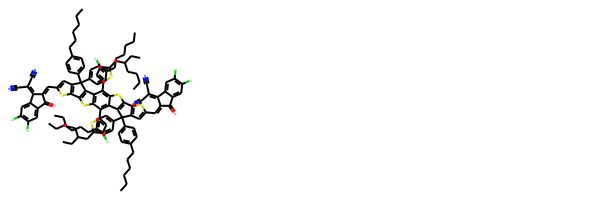



Prediction CCCCCCc1ccc(C2=C3C=C(C=C4C(=O)C(=C(C#N)C#N)c5cc(Cl)c(Cl)cc54)SC3c3sc4c5c(ccc4c32)C(=Cc2ccccc2OCC(CC)CCCCC)CC5CCC(CC)CCCC)cc1


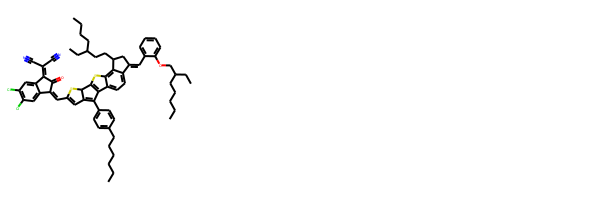

Sample: 12 

Original CCC(CCCC)COC1=C2C(C(C3=CC=C(CCCCCC)C=C3)(C4=CC=C(CCCCCC)C=C4)C5=C6SC(/C=C7C8=NC(C#N)=C(C#N)N=C8C9=CC=CC=C\79)=C5)=C6SC2=C(OCC(CC)CCCC)C%10=C1SC%11=C%10C(C%12=CC=C(CCCCCC)C=C%12)(C%13=CC=C(CCCCCC)C=C%13)C%14=C%11SC(/C=C%15C%16=NC(C#N)=C(C#N)N=C%16C%17=CC=CC=C/%15%17)=C%14


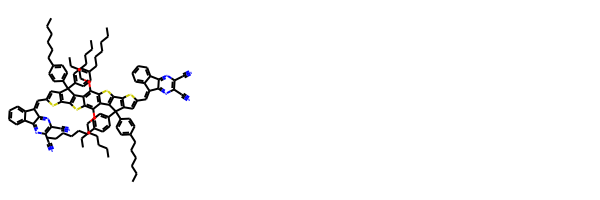



Prediction CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCc1ccc(C)cc1


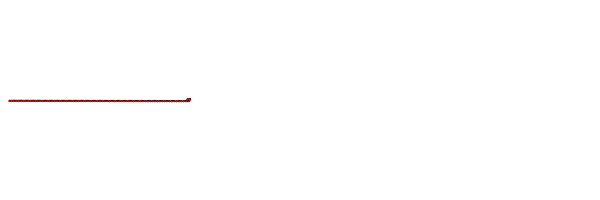

Sample: 13 

Original CCC(CCCC)COC1=C2C(C(C3=CC=C(CCCCCC)C=C3)(C4=CC=C(CCCCCC)C=C4)C5=C6SC(/C=C(C7=O)\C(C8=CC=CC=C78)=C(C#N)\C#N)=C5)=C6SC2=C(OCC(CC)CCCC)C9=C1SC%10=C9C(C%11=CC=C(CCCCCC)C=C%11)(C%12=CC=C(CCCCCC)C=C%12)C%13=C%10SC(/C=C(C%14=O)/C(C%15=CC=CC=C%14%15)=C(C#N)/C#N)=C%13


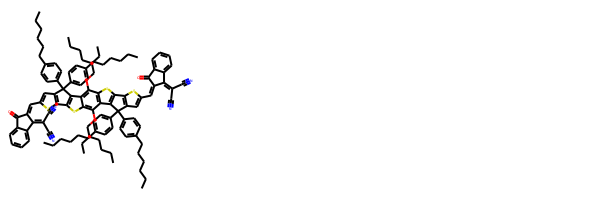



Prediction CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC(CC)CCCC


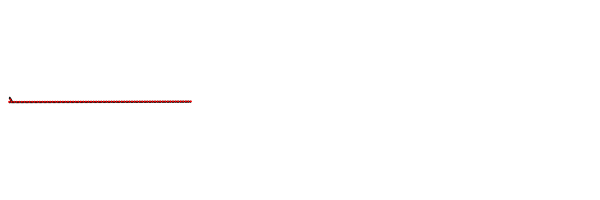

Sample: 14 

Original C1(C2=C/3C=CC=C2)=CC=CC=C1C3=C4C5=C(C=CC=C5)C6=CC=CC=C6\4


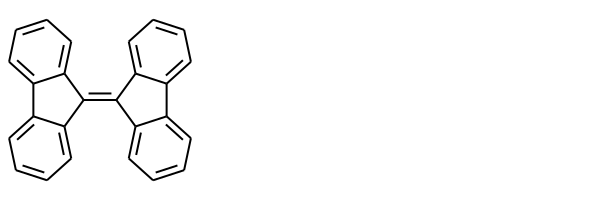



Prediction CC1(C)c2ccccc2-c2cc3c(cc21)C(=C1c2ccccc2C2OC12)c1ccccc1-3


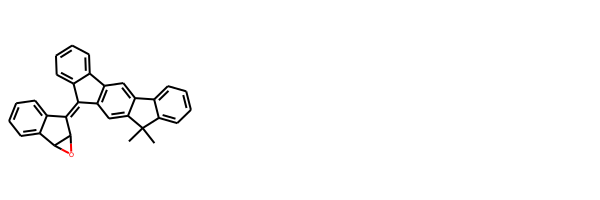

Sample: 15 

Original COC1=CC=C2C(C3=CC(OC)=CC=C3/C2=C4C5=CC=C(OC)C=C5C6=CC(OC)=CC=C\46)=C1


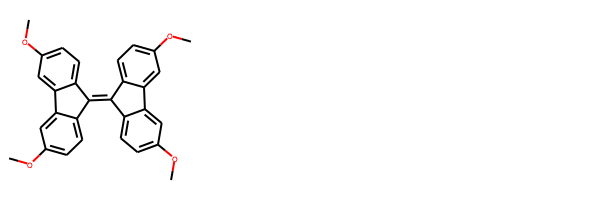



Prediction COc1ccc2c(c1)C(=C1c3cc(OC)ccc3-c3cccc(OC)c31)c1ccc(OC)cc1-2


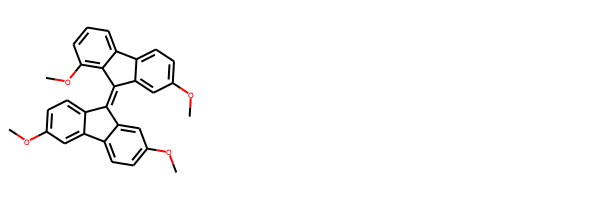

Sample: 16 

Original CCCCCCCCCCCCCCOC1=CC=C2C(C3=CC(OCCCCCCCCCCCCCC)=CC=C3/C2=C4C5=CC=C(OCCCCCCCCCCCCCC)C=C5C6=CC(OCCCCCCCCCCCCCC)=CC=C\46)=C1


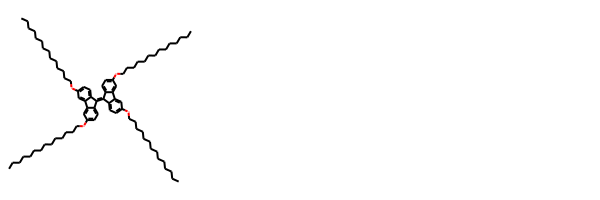



Prediction CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC


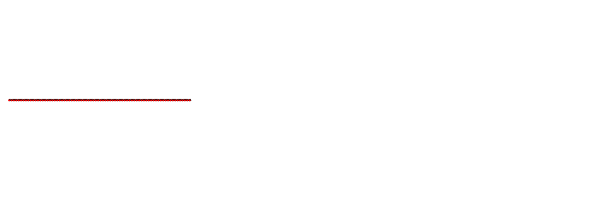

Sample: 17 

Original C1(/C2=CC3=CC=CC=C3C=C2C4=CC5=CC=CC=C5C=C14)=C6C7=CC=CC=C7C8=CC=CC=C\68


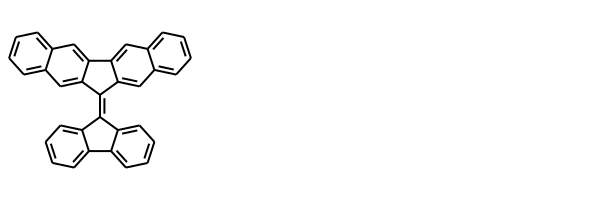



Prediction CC1(C)c2cc3c(cc2-c2cc4c(cc21)C(=C1c2ccccc2-c2ccccc21)c1ccccc1-4)-c1ccccc1C3


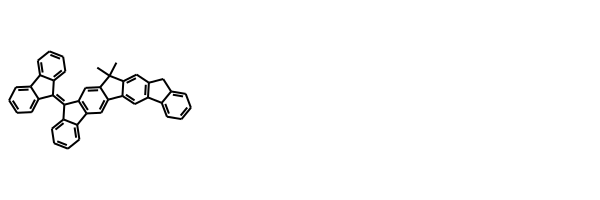

Sample: 18 

Original COC1=CC=C2C(C3=CC(OC)=CC=C3/C2=C4C5=CC6=CC=CC=C6C=C5C7=CC8=CC=CC=C8C=C\47)=C1


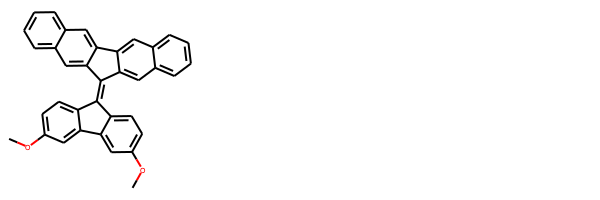



Prediction COc1ccc2c(c1)C(=C1c3cc4ccccc4cc3-c3cc4ccccc4cc31)c1c(OC)cccc1-2


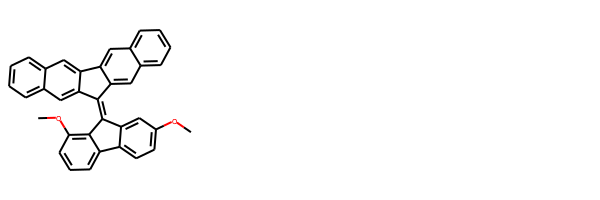

Sample: 19 

Original C1(/C2=CC3=CC=CC=C3C=C2C4=C1C=C(C=CC=C5)C5=C4)=C6C7=CC8=CC=CC=C8C=C7C9=C\6C=C(C=CC=C%10)C%10=C9


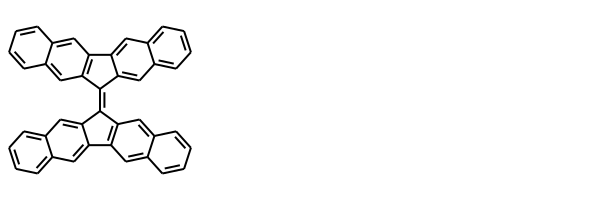



Prediction CC1=C2Sc3ccccc3C2c2c3c(c4c(c21)C(C)=C1Sc2ccccc2C14)C1(C)C(=C3)C=Cc2ccccc21


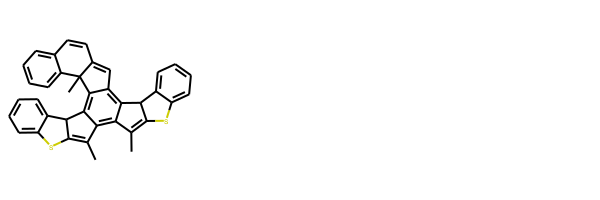

Sample: 20 

Original COC1=CC=C2C(/C(C3=CC(OC)=CC=C23)=C4C5=CC(OC)=CC=C5C6=CC=C(OC)C=C/46)=C1


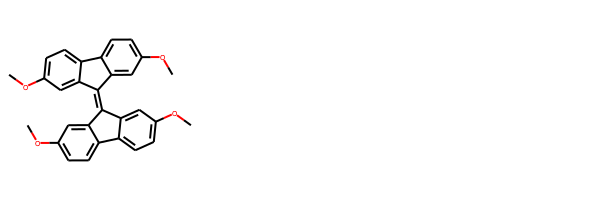



Prediction COc1ccc2c(c1)C(=C1c3cc(OC)ccc3-c3cccc(OC)c31)c1ccc(OC)cc1-2


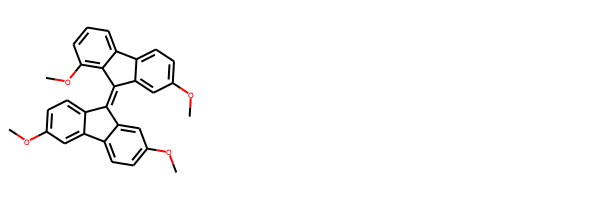

Sample: 21 

Original CCC(CCCC)CN1C(C(C(C2=CC=C(CCCCCC)C=C2)(C3=CC=C(CCCCCC)C=C3)C4=CC(C(SC(/C=C(C5=O)/C(C6=CC=CC=C56)=C(C#N)/C#N)=C7)=C7C8(C9=CC=C(CCCCCC)C=C9)C%10=CC=C(CCCCCC)C=C%10)=C8C=C%114)=C%11S%12)=C%12C%13=C1C=C(/C=C(C%14=O)/C(C%15=CC=CC=C%14%15)=C(C#N)\C#N)S%13


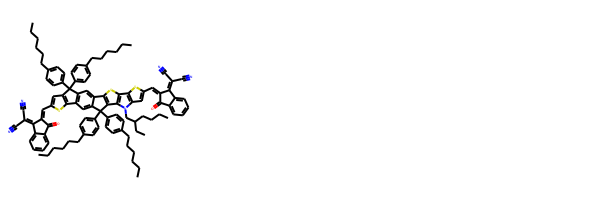



Prediction CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC(CC)CCCC


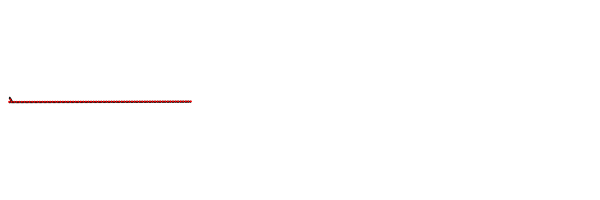

Sample: 22 

Original CCC(CCCC)CN1C(C(C(C2=CC=C(CCCCCC)C=C2)(C3=CC=C(CCCCCC)C=C3)C4=CC(C(SC(/C=C(C5=O)\C(C6=CC=C(Cl)C=C56)=C(C#N)\C#N)=C7)=C7C8(C9=CC=C(CCCCCC)C=C9)C%10=CC=C(CCCCCC)C=C%10)=C8C=C%114)=C%11S%12)=C%12C%13=C1C=C(/C=C(C%14=O)/C(C%15=CC=C(Cl)C=C%14%15)=C(C#N)/C#N)S%13


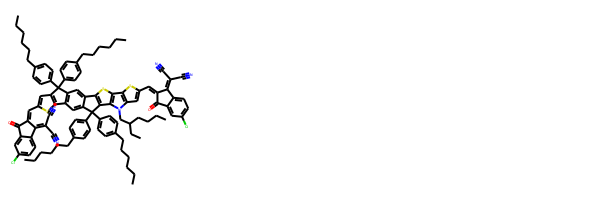



Prediction CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC(CC)CCCC


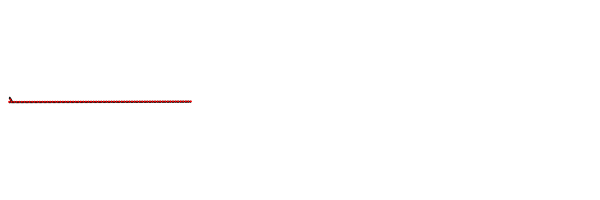

Sample: 23 

Original CCC(CCCC)CN1C(C(C(C2=CC=C(CCCCCC)C=C2)(C3=CC=C(CCCCCC)C=C3)C4=CC(C(SC(/C=C(C5=O)/C(C6=CC(Cl)=C(Cl)C=C56)=C(C#N)/C#N)=C7)=C7C8(C9=CC=C(CCCCCC)C=C9)C%10=CC=C(CCCCCC)C=C%10)=C8C=C%114)=C%11S%12)=C%12C%13=C1C=C(/C=C(C%14=O)/C(C%15=CC(Cl)=C(Cl)C=C%14%15)=C(C#N)\C#N)S%13


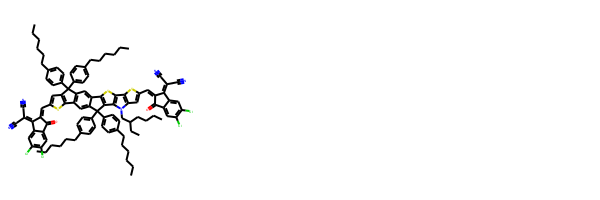



Prediction CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC(CC)CCCC


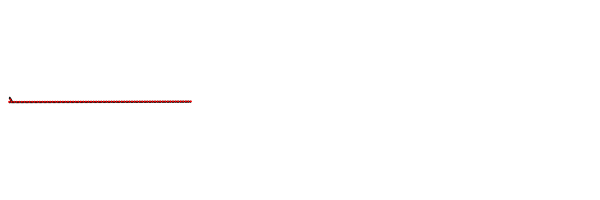

Sample: 24 

Original CCCCCCC1=CC=C(C=C1)C(C2=CC(C(SC3=C4SC5=C3C(C=C6C7=O)=C8C9=C5C=C%10C%11=C9C(C%12=CC=C(C(N7C(CCCCC)CCCCC)=O)C6=C%128)=CC=C%11C(N(C%10=O)C(CCCCC)CCCCC)=O)=C4C%13(C%14=CC=C(CCCCCC)C=C%14)C%15=CC=C(CCCCCC)C=C%15)=C%13C=C%162)(C%17=CC=C(CCCCCC)C=C%17)C%18=C%16SC%19=C%18SC%20=C%19C%21=C%22C%23=C(C%24=CC=C%23C%25=CC=C(C%26=O)C%27=C%25C%22=C%20C=C%27C(N%26C(CCCCC)CCCCC)=O)C(C(N(C%24=O)C(CCCCC)CCCCC)=O)=C%21


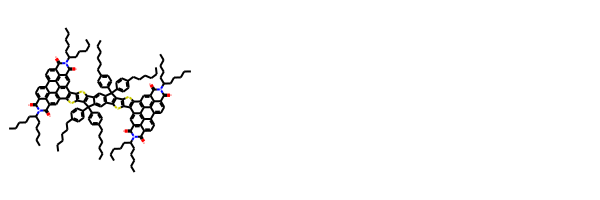



Prediction CCCCCCc1ccc(C2=C(c3ccc(CCCCCC)cc3)C(c3ccc(CCCCCC)cc3)(c3cc(CCCCCC)ccc3C3(c4ccc(CCCCCC)cc4)C=Cc4ccc5c(c43)C(c3ccc(CCCCCC)cc3)=C3C(C=C4C(=O)c6ccccc6C4=C(C#N)C#N)=CSC35)c3c2ccc2c3C(c3ccc(CCCCCC)cc3)=C3C(C=C4C(=O)c5ccccc5C4=C(C#N)C#N)=CSC32)cc1


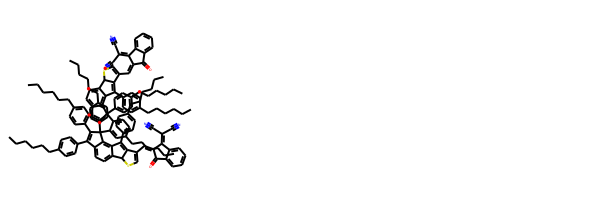

Sample: 25 

Original O=C1C(/C(C2=CC=CC=C12)=C(C#N)/C#N)=C/C3=CC(C(C4=CC=C(CCCCCC)C=C4)(C5=CC=C(CCCCCC)C=C5)C6=C7SC8=CC9=C(SC%10=C9C(C%11=CC=C(CCCCCC)C=C%11)(C%12=CC=C(CCCCCC)C=C%12)C%13=C%10SC(/C=C(C%14=O)/C(C%15=CC=CC=C%14%15)=C(C#N)/C#N)=C%13)C=C68)=C7S3


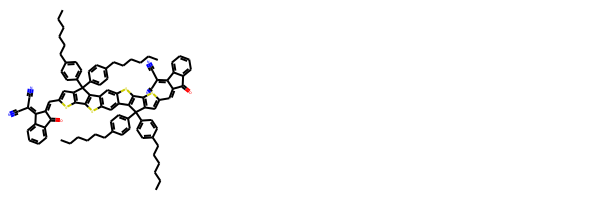



Prediction CCCCCCc1ccc(C(C#N)=Cc2ccc(C3(c4ccccc4Cc4ccc(C=C(C#N)c5ccccc5)c5ccsc45)c4cc5c(cc4-c4c6c(c7c(c43)C(c3ccc(CCCCCC)cc3)=C3C=C(C=C4C(=O)c8ccccc8C4=C(C#N)C#N)SC37)C3SC(C=C4C(=O)c7ccccc7C4=C(C#N)C#N)=CC3=C6c3ccc(CCCCCC)cc3)C3SC(C=C4C(=O)c6ccccc6C4=C(C#N)C#N)=CC3=C5c3ccc(CCCCCC)cc3)c3sccc23)cc1


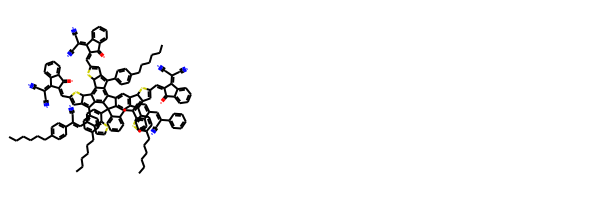

Sample: 26 

Original O=C(N1CC(CC)CCCC)C2=C(C3=CC=C(C4=CC=C(C(N5CC(CC)CCCC)=O)C6=C4C=CC=C6C5=O)S3)C7=NSN=C7C(C8=CC=C(C9=CC=C(C(N%10CC(CC)CCCC)=O)C%11=C9C=CC=C%11C%10=O)S8)=C2C1=O


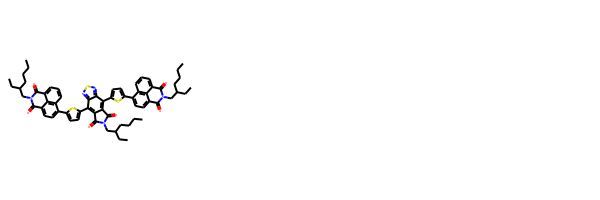



Prediction CCCCCCc1ccc(C2=C3C=C(C=Cc4cccs4)SC3c3sc(C=Cc4cc5c(s4)[SiH2]c4sc(-c6sc(C7=C(c8ccccc8)C(c8ccccc8)=C(c8ccc(-c9c(-c%10ccccc%10C)ccc%10c9C(CCCCCC)c9cc(-c%11ccc(C=Cc%12cccs%12)s%11)ccc9-%10)s8)[Si]7(C)C)c7sccc67)cc4-5)cc32)cc1


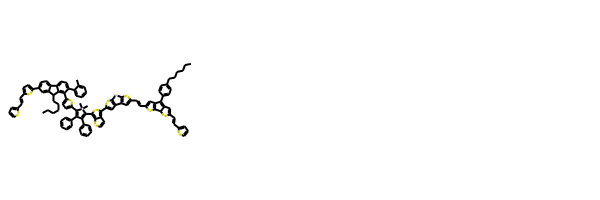

Sample: 27 

Original O=C(N(C1=O)C(CCCCCC)CCCCCC)C2=CC(C3=CC=C4C(C5(C6=CC(C7=C(C8=CC=C(C(N9C(CCCCCC)CCCCCC)=O)C%10=C8C%11=CC=C%10C9=O)C(C%11=CC=C%12C%13=O)=C%12C(C(N%13C(CCCCCC)CCCCCC)=O)=C7)=CC=C46)C%14=CC(C%15=C(C%16=CC=C(C(N%17C(CCCCCC)CCCCCC)=O)C%18=C%16C%19=CC=C%18C%17=O)C(C%19=CC=C%20C%21=O)=C%20C(C(N%21C(CCCCCC)CCCCCC)=O)=C%15)=CC=C%14C%22=CC=C(C%23=C(C%24=CC=C(C(N%25C(CCCCCC)CCCCCC)=O)C%26=C%24C%27=CC=C%26C%25=O)C(C%27=CC=C%28C%29=O)=C%28C(C(N%29C(CCCCCC)CCCCCC)=O)=C%23)C=C5%22)=C3)=C%30C%31=C2C1=CC=C%31C%32=CC=C(C%33=O)C%34=C%32C%30=CC=C%34C(N%33C(CCCCCC)CCCCCC)=O


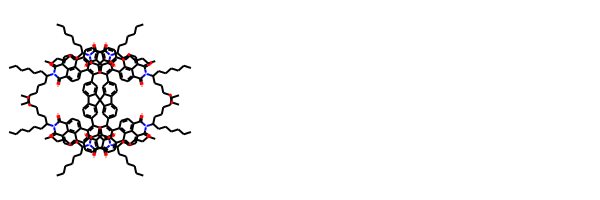



Prediction Cc1cccc(N(c2ccc(-c3ccc(C=C(C#N)C(=O)CC#N)s3)cc2)c2cccc3c2c2cc(C=Cc4cccs4)ccc2n3-c2ccc(N(c3ccccc3)c3ccccc3)cc2)c1


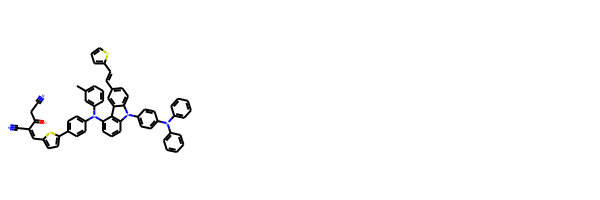

Sample: 28 

Original O=C(N1CC(CCCC)CCCCCC)/C(C2=CC=C(C3=C(CC(CCCC)CCCCCC)C=C(/C=C(C4=O)\C(C5=CC=CC=C45)=C(C#N)/C#N)S3)C=C12)=C6C7=CC=C(C8=C(CC(CCCC)CCCCCC)C=C(/C=C(C9=O)/C(C%10=CC=CC=C9%10)=C(C#N)\C#N)S8)C=C7N(CC(CCCC)CCCCCC)C\6=O


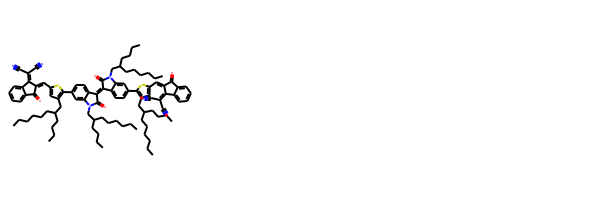



Prediction CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC(CC)CCCCC


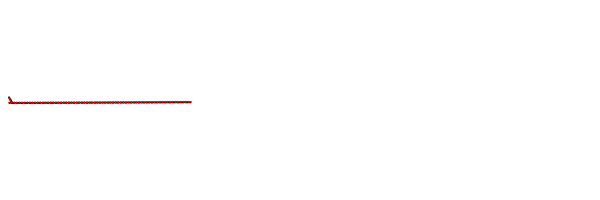

Sample: 29 

Original O=C(N1CC(CCCC)CCCCCC)/C(C2=CC=C(C(SC(/C=C(C3=O)\C(C4=CC=CC=C34)=C(C#N)\C#N)=C5)=C5OCC(CCCC)CCCCCC)C=C12)=C6C7=CC=C(C(SC(/C=C(C8=O)/C(C9=CC=CC=C89)=C(C#N)\C#N)=C%10)=C%10OCC(CCCC)CCCCCC)C=C7N(CC(CCCC)CCCCCC)C\6=O


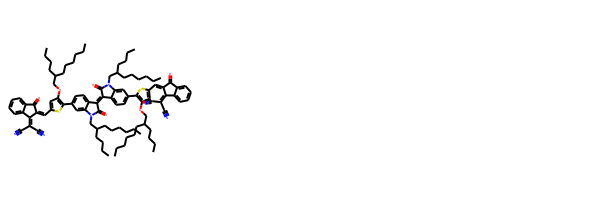



Prediction CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC(C=O)CCCCC


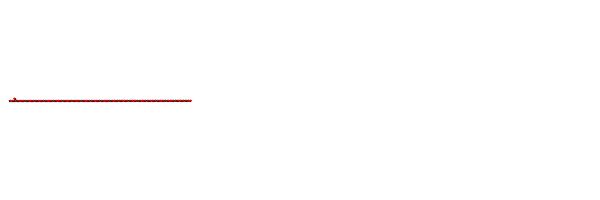

Sample: 30 

Original CCCCCCC1=CC=C(C2(C3=CC=C(CCCCCC)C=C3)C(C=C(/C=C4C(C5=C(C/4=C(C#N)/C#N)C=CC=C5)=O)S6)=C6C7=CC8=C(C(SC9=C%10SC(/C=C%11/C(C(C=CC=C%12)=C%12C%11=O)=C(C#N)\C#N)=C9)=C%10C8(C%13=CC=C(CCCCCC)C=C%13)C%14=CC=C(CCCCCC)C=C%14)C=C27)C=C1


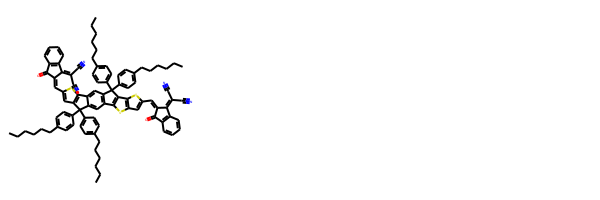



Prediction CCCCCCc1ccc(C2=C3c4sc(C=C5C(=O)c6ccccc6C5=C(C#N)C#N)cc4SC3c3ccc4c(c32)C(c2ccc(CCCCCC)cc2)(c2ccc(CCCCCC)cc2)c2sc(C=C3C5C=CC=CC5=C5C=CC=CC35)cc2-4)cc1


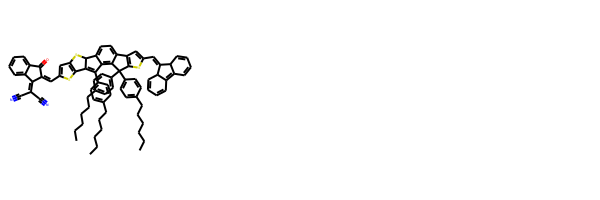

Sample: 31 

Original CCCCCCC1=CC=C(C2(C3=CC=C(CCCCCC)C=C3)C(C(SC4=C5SC(/C=C6C(C7=C(C/6=C(C#N)\C#N)C=CC=C7)=O)=C4)=C5S8)=C8C9=CC%10=C(C(SC%11=C%12SC(/C=C%13/C(C(C=CC=C%14)=C%14C%13=O)=C(C#N)\C#N)=C%11)=C%12C%10(C%15=CC=C(CCCCCC)C=C%15)C%16=CC=C(CCCCCC)C=C%16)C=C29)C=C1


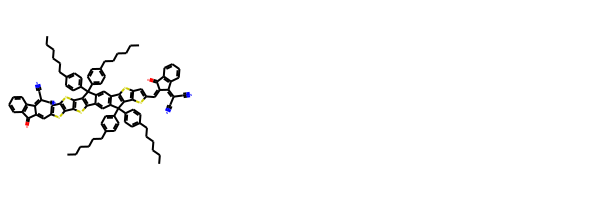



Prediction CCCCCCc1ccc(C2=C3c4sc(C=C5C(=O)c6ccccc6C5=C(C#N)C#N)cc4SC3c3ccc4c(c32)-c2cc(C=C3C5C=CC=CC5=C5C=CC=CC35)sc2C4(c2ccc(CCCCCC)cc2)c2ccc(CCCCCC)cc2)cc1


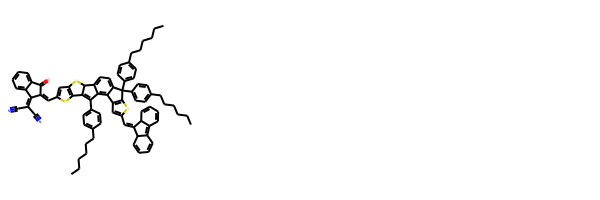

Sample: 32 

Original CCCCCCC1=CC=C(C2(C3=CC=C(CCCCCC)C=C3)C4=CC(C(SC(C(SC(/C=C(C5=O)/C(C6=CC(F)=C(F)C=C56)=C(C#N)\C#N)=C7OC)=C7OC)=C8)=C8C9(C%10=CC=C(CCCCCC)C=C%10)C%11=CC=C(CCCCCC)C=C%11)=C9C=C4C%12=C2C=C(C(SC(/C=C(C%13=O)/C(C%14=CC(F)=C(F)C=C%13%14)=C(C#N)/C#N)=C%15OC)=C%15OC)S%12)C=C1


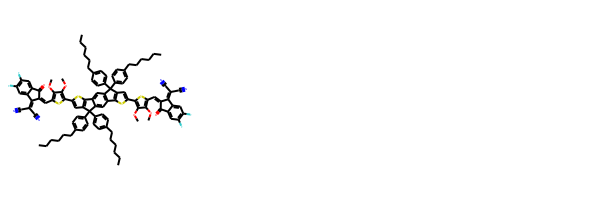



Prediction CCCCCCc1ccc(C2=C3c4sc(C=C5Cc6ccccc6C5=C(C#N)C#N)cc4SC3c3c2c2c(c4c3C3Sc5cc(C=C6Cc7ccccc7C6=C(C#N)C#N)sc5C3=C4c3ccc(CCCCCC)cc3)C(c3ccc(CCCCCC)cc3)(c3ccc(CCCCCC)c4c3-c3ccc(C=C(C#N)c5ccc(C=C(C#N)C(=O)O)s5)cc3C4(C)c3ccc(CCCCCC)cc3)c3sc4cc(C=C5Cc6ccccc6C5=C(C#N)C#N)sc4c3-2)cc1


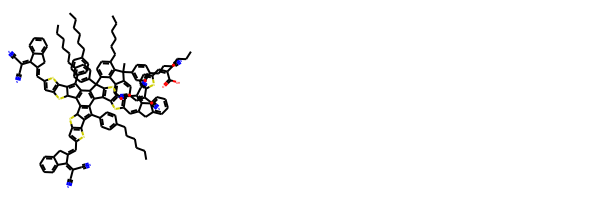

Sample: 33 

Original O=C1C(/C(C2=CC(Cl)=C(Cl)C=C12)=C(C#N)\C#N)=C/C3=CC(C(C4=CC=C(CCCCCC)C=C4)(C5=CC=C(CCCCCC)C=C5)C6=C7SC8=C(C9=CC(F)=C(CC(CC)CCCC)S9)C%10=C(SC%11=C%10C(C%12=CC=C(CCCCCC)C=C%12)(C%13=CC=C(CCCCCC)C=C%13)C%14=C%11SC(/C=C(C%15=O)/C(C%16=CC(Cl)=C(Cl)C=C%15%16)=C(C#N)/C#N)=C%14)C(C%17=CC(F)=C(CC(CC)CCCC)S%17)=C68)=C7S3


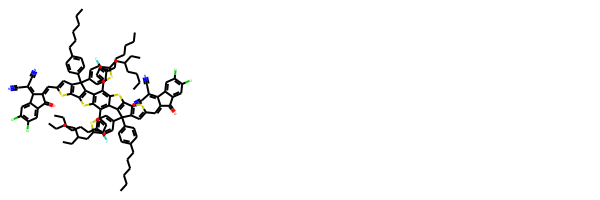



Prediction CCCCCCCCCCCCCC1Sc2scc(C=C(C#N)C#N)c2C1CCCc1cccc(OCC(CC)CCCCC)c1C=C1c2cc(C=C3C(=O)c4ccccc4C3=C(C#N)C#N)ccc2-c2c1ccc1c3c(sc21)C1SC(C=C2C(=O)C(=C(C#N)C#N)c4cc(Cl)c(Cl)cc42)=CC1=C3c1ccc(CCCCCC)cc1


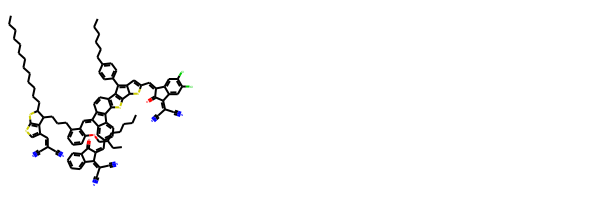

Sample: 34 

Original CCCCCCC1=CC=C(C2(C3=CC=C(CCCCCC)S3)C(C(SC(/C=C(C4=O)\C(C5=CSC=C45)=C(C#N)/C#N)=C6)=C6S7)=C7C8=CC9=C(C(SC(/C=C(C%10=O)/C(C%11=CSC=C%10%11)=C(C#N)\C#N)=C%12)=C%12C9(C%13=CC=C(CCCCCC)S%13)C%14=CC=C(CCCCCC)S%14)C=C28)S1


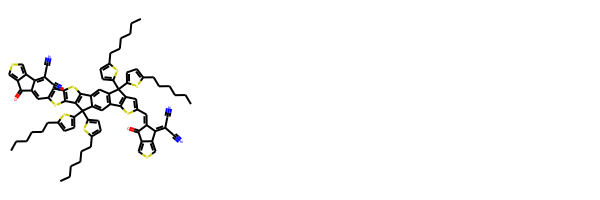



Prediction CCCCCCc1ccc(C2=C3C(C=C4Cc5ccccc5C4=C(C#N)C#N)=CSC3c3c2c2c(c4c3C3SC=C(C=C5Cc6ccccc6C5=C(C#N)C#N)C3=C4c3ccc(CCCCCC)cc3)C(c3ccc(CCCCCC)cc3)(c3ccc(CCCCCC)c4c3C(=Cc3ccc(C=Cc5cc(OC)c(-c6ccc(C=C(C#N)C#N)s6)cc5CCCCCC)s3)N(C)C4)c3sc(C=C4C(=O)c5ccccc5C4=Cc4ccc(C=Cc5ccc(CCCCCC)cc5CCCCCC)s4)cc3-2)cc1


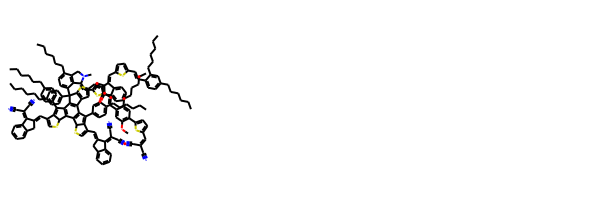

Sample: 35 

Original O=C1C(/C(C2=CC=CC=C12)=C(C#N)\C#N)=C/C3=CC4=C(C(C(C5=CC=C(CCCCCC)C=C5)(C6=CC=C(CCCCCC)C=C6)C7=CC(C(SC(/C=C(C8=O)/C(C9=CC=CC=C89)=C(C#N)/C#N)=C%10)=C%10C%11(C%12=CC=C(CCCCCC)C=C%12)C%13=CC=C(CCCCCC)C=C%13)=C%11C=C%147)=C%14S4)S3


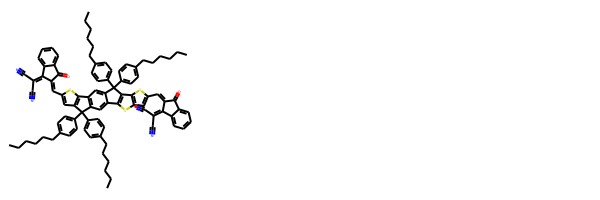



Prediction CCCCCCc1ccc(C(C#N)=Cc2ccc(C3(c4ccccc4)c4c5c(c6c(c4-c4c7c(c8c(c43)C3SC(C=C4C(=O)c9ccccc9C4=C(C#N)C#N)=CC3=C8c3ccc(CCCCCC)cc3)C3SC(C=C4Cc8ccccc8C4=C(C#N)C#N)=CC3=C7)C(c3ccc(CCCCCC)cc3)=C3C=C(C=C4C(=O)c7ccccc7C4=C(C#N)C#N)SC36)C3SC(C=C4C(=O)c6ccccc6C4=C(C#N)C#N)=CC3=C5c3ccc(CCCCCC)cc3)c3sccc23)cc1


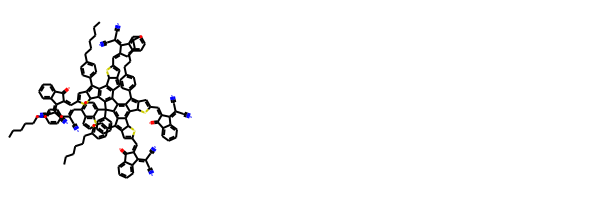

Sample: 36 

Original CCCCCCCCOC(C(SC(/C=C(C1=O)\C(C2=CC=CC=C12)=C(C#N)/C#N)=C3OCCCCCCCC)=C3S4)=C4C5=CC=C6C(C7(C8=CC(C(SC9=C%10SC(/C=C(C%11=O)/C(C%12=CC=CC=C%11%12)=C(C#N)\C#N)=C9OCCCCCCCC)=C%10OCCCCCCCC)=CC=C68)C%13=CC(C(SC%14=C%15SC(/C=C(C%16=O)\C(C%17=CC=CC=C%16%17)=C(C#N)/C#N)=C%14OCCCCCCCC)=C%15OCCCCCCCC)=CC=C%13C%18=CC=C(C(SC%19=C%20SC(/C=C(C%21=O)/C(C%22=CC=CC=C%21%22)=C(C#N)/C#N)=C%19OCCCCCCCC)=C%20OCCCCCCCC)C=C7%18)=C5


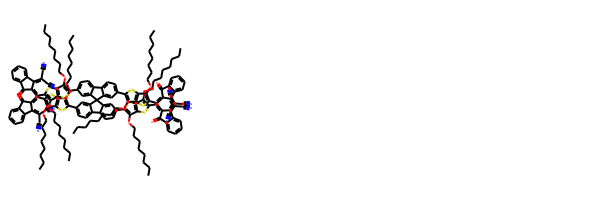



Prediction CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCOc1ccc2c(c1)CCC2=Cc1cccc(OCCCCCCCC)c1


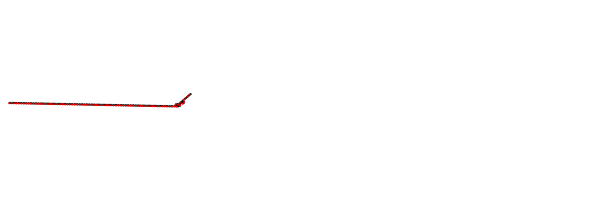

Sample: 37 

Original CCCCCC[Si]1(C(C(SC(C2=C3C=C(/C=C4/C(C(C=CC=C5)=C5C4=O)=C(C#N)/C#N)S2)=C6[Si]3(CCCCCC)CCCCCC)=C6S7)=C7C8=C1C=C(/C=C9/C(C(C=CC=C%10)=C%10C9=O)=C(C#N)/C#N)S8)CCCCCC


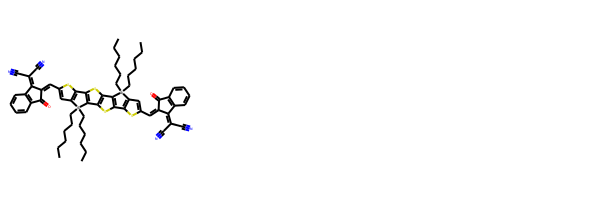



Prediction CCCCCCc1ccc(C2=C3C=C(C=C4C(=O)c5ccccc5C4=C(C#N)C#N)SC3c3sc4c(c32)C(CCCCCC)C2(c3c(C=C(C#N)C#N)c5c6c(sc5c5c7c(sc35)C3SC(C=C5C(=O)c8ccccc8C5=C(C#N)C#N)=CC3=C7c3ccc(CCCCCC)cc3)C3SC(C=C5C(=O)c7ccccc7C5=C(C#N)C#N)=CC3=C6c3ccc(CCCCCC)cc3)SC3=C(C=C5C=C(C=C6CC=CC6=C(C#N)C#N)SC53)C2=C4)cc1


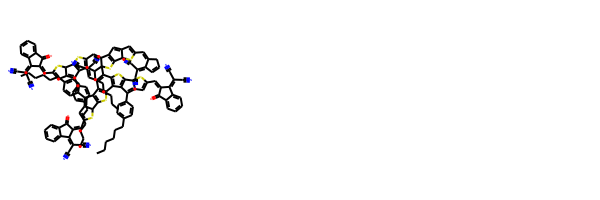

Sample: 38 

Original CCCCCCCCC1=C2C(C(C3=CC=C(CCCCCC)C=C3)(C4=CC=C(CCCCCC)C=C4)C5=C6SC(/C=C(C7=O)\C(C8=CC=CC=C78)=C(C#N)/C#N)=C5)=C6SC2=C(CCCCCCCC)C9=C1SC%10=C9C(C%11=CC=C(CCCCCC)C=C%11)(C%12=CC=C(CCCCCC)C=C%12)C%13=C%10SC(/C=C(C%14=O)/C(C%15=CC=CC=C%14%15)=C(C#N)/C#N)=C%13


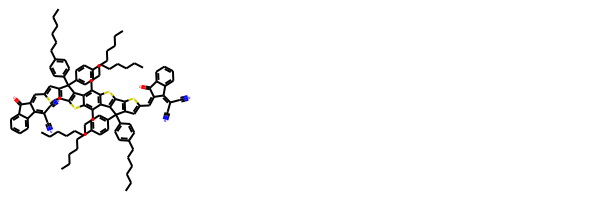



Prediction CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC


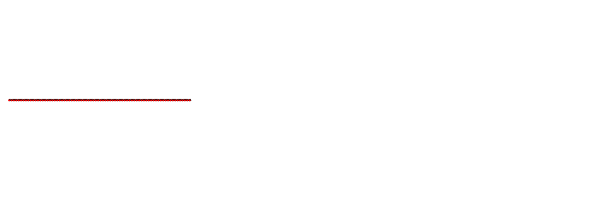

Sample: 39 

Original CCCCCCOC1=CC=CC(C2(C3=CC(OCCCCCC)=CC=C3)C(C(SC(/C=C(C4=O)\C(C5=CC(Cl)=C(Cl)C=C45)=C(C#N)/C#N)=C6)=C6S7)=C7C8=CC9=C(C(SC%10=C%11SC(/C=C(C%12=O)/C(C%13=CC(Cl)=C(Cl)C=C%12%13)=C(C#N)/C#N)=C%10)=C%11C9(C%14=CC(OCCCCCC)=CC=C%14)C%15=CC(OCCCCCC)=CC=C%15)C=C28)=C1


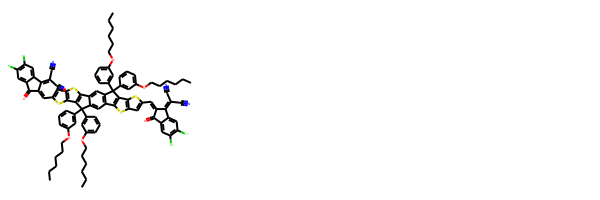



Prediction CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCOc1cccc(Oc2c(CCCCCCCCC)c3sc4c(c3c3sc5c(c23)C(c2ccc(CCCCCC)cc2)=C2C=C(C=C3C(=O)C(C(C#N)C#N)c6cc(Cl)c(Cl)cc63)SC25)C(c2ccc(CCCCCC)cc2)=C2C=C(C=C3C(=O)C(C(C#N)C#N)c5cc(Cl)c(Cl)cc53)SC24)c1


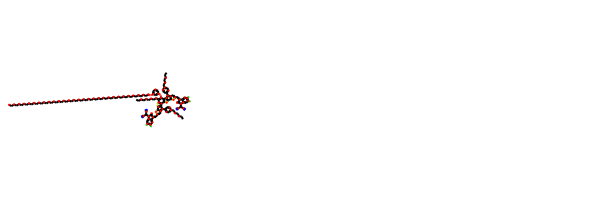

Sample: 40 

Original O=C(N(C1=O)CC(CC)CCCC)C2=C(C3=CC=C(C4=CC=C(N(C5=CC=C(C6=CC=C(C7=C(C(N(CC(CC)CCCC)C8=O)=O)C(C8=CC=C9C%10=C%11OCCOC)=C9C(C%12=CC=C(C%13=O)C(C(C(N%13CC(CC)CCCC)=O)=C%11)=C%12%10)=C7)S6)C=C5)C%14=CC=C(C%15=CC=C(C%16=C(C(N(CC(CC)CCCC)C%17=O)=O)C(C%17=CC=C%18C%19=C%20OCCOC)=C%18C(C%21=CC=C(C%22=O)C(C(C(N%22CC(CC)CCCC)=O)=C%20)=C%21%19)=C%16)S%15)C=C%14)C=C4)S3)C=C(C%23=CC=C(C%24=O)C%25=C%23%26)C%27=C2C1=CC=C%27C%26=C(C=C%25C(N%24CC(CC)CCCC)=O)OCCOC


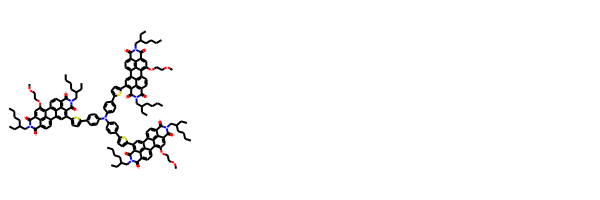



Prediction C=O


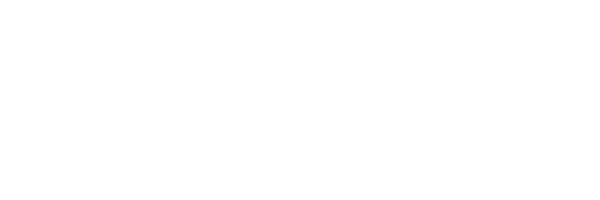

Sample: 41 

Original CCC(N1C(/C=C/C2=CC=C(/C=C/C3=NC(C#N)=C(C#N)N3C(CC)CCCC)C4=NSN=C24)=NC(C#N)=C1C#N)CCCC


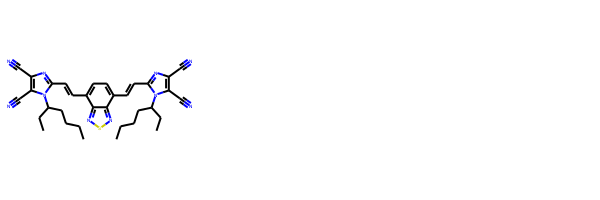



Prediction CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC(CC)CCCC


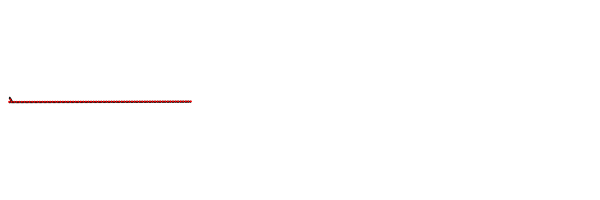

Sample: 42 

Original O=C1C(/C(C2=CSC(C)=C12)=C(C#N)\C#N)=C\C3=CC(C(C4=CC=C(CCCCCC)C=C4)(C5=CC=C(CCCCCC)C=C5)C6=C7SC8=C(C9=CC=C(CC(CC)CCCC)S9)C%10=C(SC%11=C%10C(C%12=CC=C(CCCCCC)C=C%12)(C%13=CC=C(CCCCCC)C=C%13)C%14=C%11SC(/C=C(C%15=O)\C(C%16=CSC(C)=C%15%16)=C(C#N)\C#N)=C%14)C(C%17=CC=C(CC(CC)CCCC)S%17)=C68)=C7S3


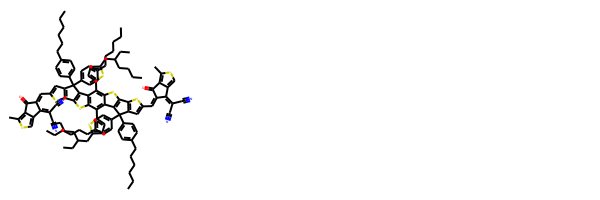



Prediction CCCCCCc1ccc(C2=C3C=C(C=C4C(=O)C(=C(C#N)C#N)c5cc(Cl)c(Cl)cc54)SC3c3sc4c(OCC(CC)CCCC)c5c6c(sc5c(OCC(CC)CCCC)c4c32)C2SC(C=C3C(=O)C(=C(C#N)C#N)c4cc(Cl)c(Cl)cc43)=CC2=C6c2ccc(CCCCCC)cc2)cc1


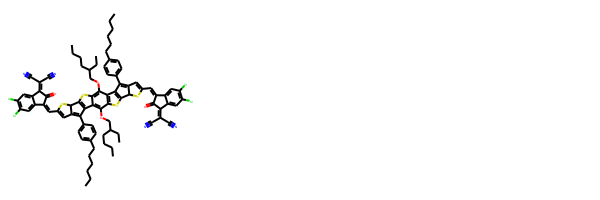

Sample: 43 

Original CCC(CCCC)COC1=C2C(C(C3=CC=C(CCCCCC)C=C3)(C4=CC=C(CCCCCC)C=C4)C5=C6SC(/C=C(C7=O)/C(C8=CSC(C)=C78)=C(C#N)\C#N)=C5)=C6SC2=C(OCC(CC)CCCC)C9=C1SC%10=C9C(C%11=CC=C(CCCCCC)C=C%11)(C%12=CC=C(CCCCCC)C=C%12)C%13=C%10SC(/C=C(C%14=O)\C(C%15=CSC(C)=C%14%15)=C(C#N)/C#N)=C%13


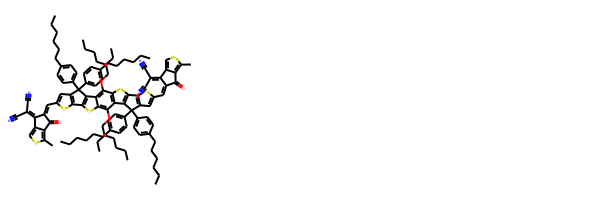



Prediction CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC(CC)CCCC


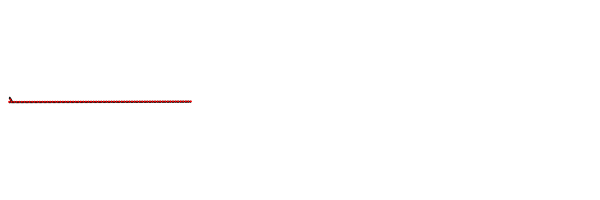

Sample: 44 

Original CCCCCCC1=CC=C(C2(C3=CC=C(CCCCCC)C=C3)C(C(SC(C(C=C(OC)C(/C=C(C#N)/C#N)=C4)=C4OC)=C5)=C5S6)=C6C7=CC8=C(C(SC9=C%10SC(C(C=C(OC)C(/C=C(C#N)/C#N)=C%11)=C%11OC)=C9)=C%10C8(C%12=CC=C(CCCCCC)C=C%12)C%13=CC=C(CCCCCC)C=C%13)C=C27)C=C1


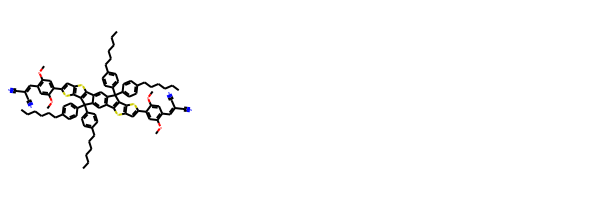



Prediction CCCCCCc1ccc(C2=C3c4sc(C=C5Cc6ccccc6C5=C(C#N)C#N)cc4SC3c3c2c2c(c4c3C3Sc5cc(C=C6Cc7ccccc7C6=C(C#N)C#N)sc5C3=C4c3ccc(CCCCCC)cc3)C(c3ccc(CCCCCC)cc3)(c3ccc(CCC4SC(C)=CC4CC)c4c3-c3ccc(-c5ccc(C=C(C#N)C(=O)O)s5)cc3C4(c3ccc(CCCCCC)cc3)c3ccc(CCCCCC)cc3)c3sc4cc(C=C5Cc6ccccc6C5=C(C#N)C#N)sc4c3-2)cc1


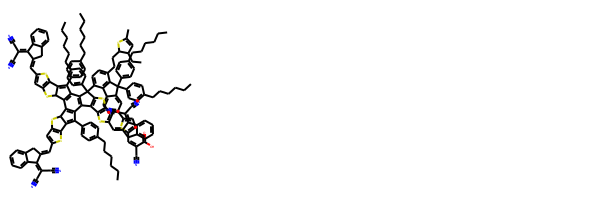

Sample: 45 

Original CCCCCCC1(C2=CC(C(SC(/C=C(C3=O)/C(C4=CC(Cl)=C(Cl)C=C34)=C(C#N)\C#N)=C5)=C5C6(CCCCCC)CCCCCC)=C6C=C2C7=C1C=C(/C=C(C8=O)/C(C9=CC(Cl)=C(Cl)C=C89)=C(C#N)\C#N)S7)CCCCCC


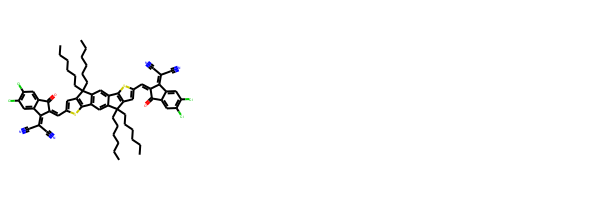



Prediction CCCCCCc1ccc(C=Cc2ccc(C=Cc3ccc4c(c3)C(c3ccc(OC)c5c3c3cc(C=Cc6cccs6)ccc3n5C)c3c(CCCCCC)ccc(C5(c6ccc(CCCCCC)cc6)c6scc(C=C7C(=O)c8ccccc8C7=Cc7ccc(C=C(C#N)C#N)c8ccsc78)c6-c6c7c(c8c(c65)C(c5ccc(CCCCCC)cc5)=C5C(C=C6Cc9ccccc9C6=C(C#N)C#N)=CSC58)C5SC=C(C=C6Cc8ccccc8C6=C(C#N)C#N)C5=C7c5ccc(CCCCCC)cc5)c3-4)s2)cc1


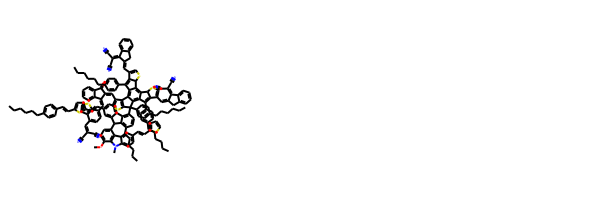

In [61]:
# soft 
for sample in hard_predictions.iterrows():
    print('Sample: ' + str(sample[0]), '\n')
    
    # original 
    print('Original', sample[1]['original'])
    display(Draw.MolsToGridImage([Chem.MolFromSmiles(sample[1]['original'])]))
    print('\n')
    
    # generated
    print('Prediction', sample[1]['generated'])
    display(Draw.MolsToGridImage([Chem.MolFromSmiles(sample[1]['generated'])]))

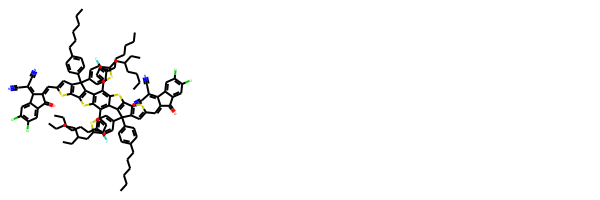

In [50]:
# original 
display(Draw.MolsToGridImage([Chem.MolFromSmiles(soft_predictions.iloc[10]['original'])]))